# Classification using MNIST dataset

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [5]:
X = mnist['data']
y = mnist['target']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image
is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to
do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it
using Matplotlib’s imshow() function:

##### Trying to plot the image using Matplotlib

In [8]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def draw_image(index):
    some_digit = X.iloc[index,:].to_numpy()
    some_image_image = some_digit.reshape(28,28)
    plt.imshow(some_image_image, cmap='binary')
    plt.axis('off')
    print("The image at the specified index is off: ", y[index])

The image at the specified index is off:  4


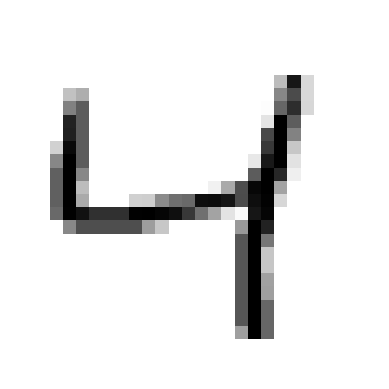

In [10]:
draw_image(2)


The image at the specified index is off:  4


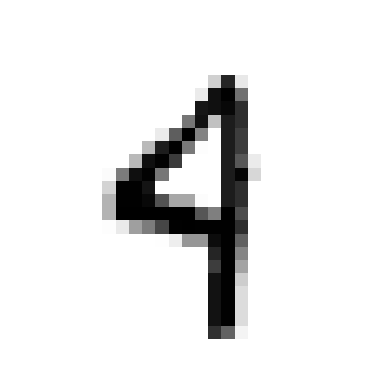

In [11]:
draw_image(21232)

In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


In [13]:
y = y.astype(int)

In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype
--------------  -----
70000 non-null  int64
dtypes: int64(1)
memory usage: 547.0 KB


### Splitting the dataset

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Binary Class Classifier
We are building a binary class classifier which only detects if the entered number is 5 or not. This is `5 test`

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
y_train_5.value_counts()

class
False    54579
True      5421
Name: count, dtype: int64

##### Choosing a right model for this we will choose SGD

In [18]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)

In [19]:
sgd.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [20]:
pred = sgd.predict(X_test)
pred

array([False, False, False, ..., False,  True, False], shape=(10000,))

### Evaluating the model

##### Accuracy using cross validation

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skf = StratifiedKFold(n_splits=3,random_state=None)
for train_index, test_index in skf.split(X_train, y_train_5):
    copy_sgd = clone(sgd)
    X_train_fold = X_train.to_numpy()[train_index]
    X_test_fold = X_train.to_numpy()[test_index]
    y_train_fold = y_train_5.to_numpy()[train_index]
    y_test_fold = y_train_5.to_numpy()[test_index]

    copy_sgd.fit(X_train_fold, y_train_fold)
    fold_pred = copy_sgd.predict(X_test_fold)
    accuracy = (sum(fold_pred == y_test_fold)/len(y_test_fold))*100
    print("Percentage of accuracy for test data: ", accuracy)

Percentage of accuracy for test data:  95.035
Percentage of accuracy for test data:  96.035
Percentage of accuracy for test data:  96.04


##### We can do the same thing by using a function called cross val scopre which does all of this computing internally

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train, y_train, scoring='accuracy',cv = 3, n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

##### Creating a dunmb model that will always predict not 5

In [23]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X), 1), dtype = bool)

In [24]:
model = Never5Classifier()

In [25]:
pred_new_model = model.predict(X_test)

In [26]:
cross_val_score(model,X_train, y_train_5, scoring='accuracy',cv = 3,n_jobs = -1)

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. Beats Nostradamus.
This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

### Confusion Matrix

In [27]:
from sklearn.model_selection import cross_val_predict
cross_pred = cross_val_predict(sgd, X_train, y_train_5,cv = 3, n_jobs = -1)

In [28]:
cross_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, cross_pred)

array([[53892,   687],
       [ 1891,  3530]])

### Precision and Recall

Other then confusion matrix we also have other metrics like Precision and Accuracy

##### What is Precision?
Precision means out of all positive predictions of model how many of them were actually postitive.
<br><br>
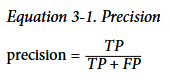

In [30]:
from sklearn.metrics import precision_score
print("precision_score: ", precision_score(y_train_5, cross_pred))

precision_score:  0.8370879772350012


What does this precision represents? It tells out of all predicted values of yes it is 5! How many of them weere actually 5? 

### What is Recall?
Out of all the actual positive cases, how many did the model correctly predict as positive?
<br><br>
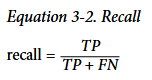

In [31]:
from sklearn.metrics import recall_score
print("Recall Score: ", recall_score(y_train_5, cross_pred))

Recall Score:  0.6511713705958311


What does this value represents? Out of all of the actuall 5s how many f them were actually predicted 5?

### F1 score
It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1 score is
the harmonic mean of precision and recall

In [32]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_train_5, cross_pred))

F1 Score:  0.7325171197343847


#### increasing precision reduces recall

### Manually Setting the threshold 

Scikit learn does not allow us to manully change the threshold but it do give us the access to get decsion score. This decision score is basically the distance between the data point and decision boundary

In [33]:
some_digit = X.iloc[0,:].to_numpy()


In [34]:
score = sgd.decision_function([some_digit]).astype(int)
score

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164])

In [35]:
threshhold = 0

In [36]:
y_some_digit_pred = (score > threshhold)
y_some_digit_pred

array([ True])

Raising the threshold

In [37]:
threshhold = 8000
y_some_digit_pred = (score > threshhold)
y_some_digit_pred

array([False])

The relation between recall and threshold is inverse

### Decising perfect Threshold value

firstly calculateuse the cross_val_predict()
function to get the scores of all instances in the training set, but this time specify that
you want to return decision scores instead of predictions:


In [38]:
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3,method="decision_function", n_jobs=-1)

In [39]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

With these scores, use the precision_recall_curve() function to compute precision
and recall for all possible thresholds:

##### Precision_recall_scores is the function that is used to calculate precision, recall and threshold by using decision scores

In [40]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [41]:
precision,recall,threshold

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ], shape=(60001,)),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00], shape=(60001,)),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905],
       shape=(60000,)))

In [42]:
precision[-1],recall[-1],threshold[-1]

(np.float64(1.0), np.float64(0.0), np.float64(49441.437659047755))

In [43]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()

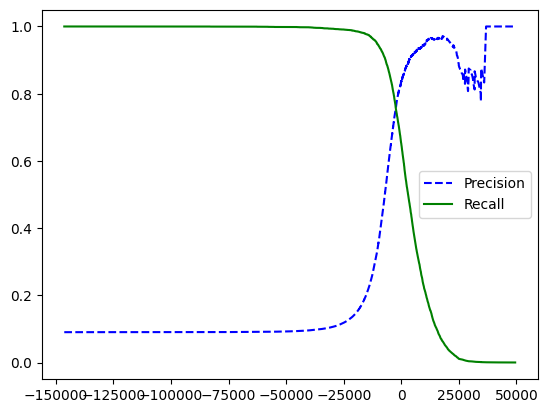

In [44]:
plot_precision_recall_vs_threshold(precision,recall,threshold)

The bump in the precision curve happens because when you raise the threshold, some true positives are removed but false positives might be removed too — this can make precision go up or down.

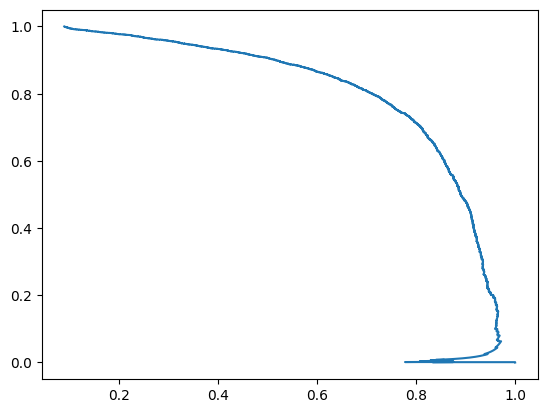

In [45]:
plt.plot(precision, recall)

Suppose you decide to aim for 90% precision. You look up the first plot and find that
you need to use a threshold of about 8,000. To be more precise you can search for the
lowest threshold that gives you at least 90% precision (np.argmax() will give you the
first index of the maximum value, which in this case means the first True value)

### Building and Evaluating the model for 90% precision

In [46]:
threshold_90_precision = threshold[np.argmax(precision>0.90)]

In [47]:
threshold_90_precision

np.float64(3370.0194991439557)

In [48]:
new_y_train = y_scores>=threshold_90_precision

In [49]:
precision_score(y_train_5, new_y_train)

0.9000345901072293

In [50]:
recall_score(y_train_5, new_y_train)

0.4799852425751706

### ROC curve

the ROC curve plots the true positive rate (another name
for recall) against the false positive rate (FPR). The FPR is the ratio of negative instan‐
ces that are incorrectly classified as positive. 

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores, )

In [52]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ], shape=(3908,)),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00], shape=(3908,)),
 array([             inf,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174],
       shape=(3908,)))

In [53]:
def plot_roc(fpr,tpr,label = None):
    plt.plot(fpr, tpr,linewidth =1 ,label = label)
    plt.plot([0, 1], [0, 1],'k--')

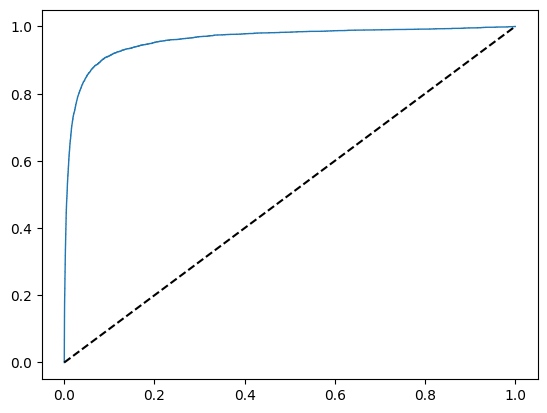

In [54]:
plot_roc(fpr,tpr)

##### A perfect way to evaluate a classifier is to calcualate area under the curve.
A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

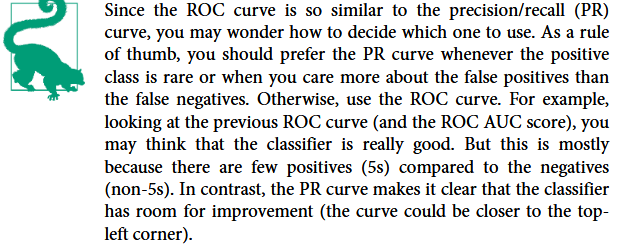

### Training a RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest, X_train, y_train_5,cv=3, method='predict_proba', n_jobs=-1)

In [57]:
y_score_forest = y_proba_forest[:,1]

In [58]:
fpr_forest, tpr_forest, threshold = roc_curve(y_train_5, y_score_forest)

##### Comparing the two curve 

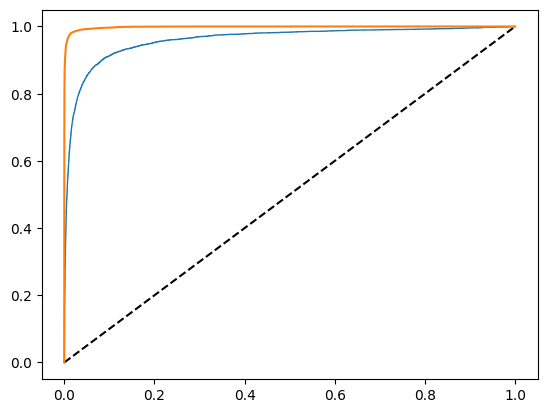

In [59]:
plot_roc(fpr, tpr)
plt.plot(fpr_forest, tpr_forest)

Try measuring the precision and recall scores: you should find 99.0% precision and
86.6% recall. Not too bad!
You now know how to train binary classifiers, choose the appropriate metric for your
task, evaluate your classifiers using cross-validation, select the precision/recall trade-
off that fits your needs, and use ROC curves and ROC AUC scores to compare vari‐
ous models. Now let’s try to detect more than just the 5s.

### Multi class classification problem

One way to create a system that can classify the digit images into 10 classes (from 0 to
9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-
detector, and so on).  Another strategy is to train a binary classifier for every pair of digits: one to distin‐
guish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. 

In [60]:
from sklearn.svm import SVC
svc  = SVC()
svc.fit(X_train,y_train)
svc.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

If you call the decision_function() method, you will see that it returns 10 scores
per instance (instead of just 1). That’s one score per class

In [61]:
some_digit_score = svc.decision_function([some_digit])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The highest score is indeed the one corresponding to class 5

In [62]:
np.argmax(some_digit_score)

np.int64(5)

In [63]:
svc.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

##### You can also be specific whether you want to use One vs One strategy or One vs All strategy

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

##### Evaluating the model

In [ ]:
cross_val_score(svc,X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

array([0.977 , 0.9738, 0.9739])

In [ ]:
y_train_pred = cross_val_predict(svc, X_train, y_train, cv = 3, n_jobs = -1)

In [70]:
confusion_matrix(y_train,y_train_pred)


array([[5863,    3,   10,    2,    4,    8,   14,    2,   13,    4],
       [   1, 6664,   26,    9,   10,    1,    3,   10,   10,    8],
       [  19,    9, 5811,   16,   26,    5,    8,   30,   28,    6],
       [   3,    9,   54, 5891,    2,   62,    1,   30,   61,   18],
       [   5,   11,   13,    0, 5712,    0,   20,    9,    4,   68],
       [  11,    6,   10,   57,   14, 5255,   35,    4,   17,   12],
       [  20,    8,    7,    0,   10,   32, 5831,    0,   10,    0],
       [   5,   21,   42,    6,   35,    2,    1, 6100,    7,   46],
       [   8,   29,   19,   38,   20,   39,   21,    9, 5646,   22],
       [  14,   11,    4,   31,   72,   16,    2,   59,   19, 5721]])

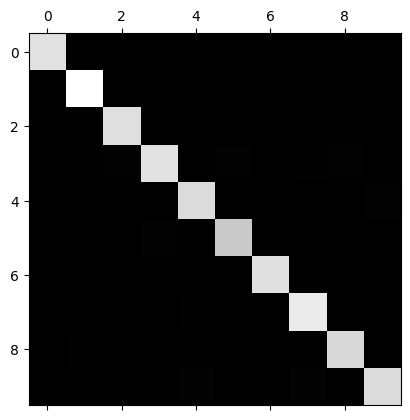

In [75]:
plt.matshow(confusion_matrix(y_train,y_train_pred),cmap = plt.cm.gray)

The diagonal cell for that class will be brighter just because there are more samples.

So we can just to see the difference we can do this:

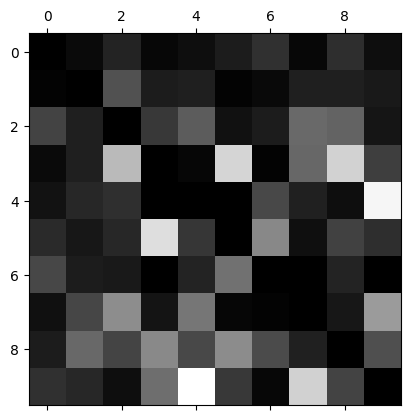

In [77]:
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx = conf_mx / conf_mx.sum(axis=1, keepdims=True)
np.fill_diagonal(conf_mx, 0)
plt.matshow(conf_mx, cmap = plt.cm.gray)

### Multilabel Classification

In [78]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large= y_train >= 7
y_train_large

0        False
1        False
2        False
3        False
4         True
         ...  
59995     True
59996    False
59997    False
59998    False
59999     True
Name: class, Length: 60000, dtype: bool

In [79]:
y_train_odd = (y_train %2 == 1)
y_train_odd

0         True
1        False
2        False
3         True
4         True
         ...  
59995    False
59996     True
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [81]:
len(y_train_large), len(y_train_odd)

(60000, 60000)

In [80]:
y_multilabel = np.c_[y_train_large,y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]], shape=(60000, 2))

In [83]:
klf = KNeighborsClassifier()
klf.fit(X_train,y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [84]:
klf.predict([some_digit])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [85]:
klf_cv = cross_val_predict(klf, X_train, y_multilabel, cv = 3, n_jobs = -1)
klf_cv

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]], shape=(60000, 2))

In [86]:
f1_score(y_multilabel, klf_cv,average = 'macro')

0.9764102655606048

For imbalance dataset where the number of instances are not equal of the classes whereas macro is the simple mean and weighted is the weighted mean. So, It is better to use weighted in imbalance dataset scenario